### 线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [7]:
x = X[:, 0]
x.shape

(506,)

In [8]:
x = x[:30]
y = y[:30]

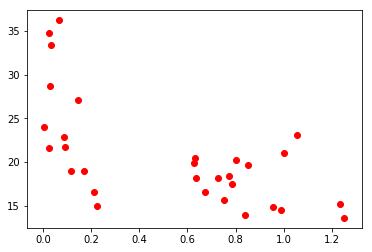

In [9]:
plt.scatter(x, y, color='r',marker='o')

In [11]:
X = X[Y < 50]
Y = Y[Y < 50]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lin_reg.coef_

array([-9.99087325e-02,  3.07276889e-02, -6.21012102e-02,  2.04367186e-01,
       -1.05014263e+01,  4.11573031e+00, -3.14873342e-02, -1.11876418e+00,
        1.89294484e-01, -1.14163165e-02, -8.81774146e-01,  6.36532420e-03,
       -3.23511475e-01])

In [26]:
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [15]:
lin_reg.intercept_

30.079838868939017

In [16]:
y_predict = lin_reg.predict(X_test)

In [17]:
y_mean = np.mean(Y_test)

In [18]:
n = (y_predict-Y_test).dot(y_predict-Y_test)
d = (y_mean-Y_test).dot(y_mean-Y_test)

In [23]:
r_squrated = 1 - n/d  # 自己写的R Squarted进行预测

In [21]:
r_squrated

0.7384427470528461

In [27]:
lin_reg.score(X_test, Y_test)  # 与sklearn封装进去的是一样的

0.7384427470528461

### 用kNN进行线性回归预测

In [34]:
first = {'weights': ['uniform'],
         'n_neighbors': [k for k in range(1, 11)]
        }

second = {'weights': ['distance'],
          'p': [p for p in range(1, 6)],
          'n_neighbors': [k for k in range(1, 11)]
        }

In [35]:
param_grid = [first, second]

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid)

In [38]:
grid_search.fit(X_train, Y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'p': [1, 2, 3, 4, 5], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
grid_search.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [41]:
grid_search.best_estimator_.score(X_test, Y_test)

0.5526174887206858

### 综上所诉，说明还是数据有线性关系，用linear和knn还是有差距的，兄弟们，哈哈